# Class Assignment 7: Ising Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

class IsingMod:
    def __init__(self,x,y,B=1.0,J=1.0,mu=1.0,kT=1.0,xrange=2,yrange=2):
        self.x = x          # Intializing the different values
        self.y = y         
        self.B = B
        self.J = J
        self.mu = mu
        self.kT = kT
        self.xrange = xrange
        self.yrange = yrange
        self.prob = 0
        self.config = np.ones((x,y),dtype=np.int)
    
    def __str__(self):          # Printing configuration
        return str(self.config)
    
    def reset(self):            # Reset the configuration
        self.config = np.ones((x,y),dtype=np.int)
    
    def random_config(self):            # Randomizing the configuration
        for i in range(self.x):
            for j in range(self.y):
                if (np.random.randint(2)):
                    self.config[i][j] = 1
                else:
                    self.config[i][j] = -1
    
    def Mag(self):                      # Computing magnetization
        return self.mu*np.sum(self.config)/(self.x * self.y)
    
    def E(self):                        # Computing energy
        V = -1 * self.B * np.sum(self.config)
        V *= self.xrange + self.yrange - 1

        V_temp,V_x,V_y = 0,0,0          # temporary variables for energy
        for i in range(self.x):         # Iterating over lengths in x,y directions
            for j in range(self.y):
                if (j < self.y-1):
                    V_temp -= self.config[i][j] * self.config[i][j+1]
                if (i < self.x-1):
                    V_temp -= self.config[i][j] * self.config[i+1][j]
        V_temp = V_temp * (self.xrange + self.yrange - 1)

        for j in range(self.x):         # Computing the temporary variables
            V_y -= self.config[j][0] * self.config[j][-1]
        V_y *= self.yrange

        for j in range(self.y):
            V_x -= self.config[0][j] * self.config[-1][j]
        V_x *= self.xrange      

        V_temp = (V_temp + V_x + V_y)*self.J
        V = V + V_temp
        return V

    def MC(self):                           # Calculating spin sum based on the configuration
        ny = np.random.randint(0,self.y)
        nx = np.random.randint(0,self.x)
        
        spin_sum=0
        
        if ny!=self.y-1:
            spin_sum+=self.config[nx][ny+1]
        else:
            spin_sum+=self.config[nx][0]
        if ny!=0:
            spin_sum+=self.config[nx][ny-1]
        else:
            spin_sum+=self.config[nx][-1]    
        if nx != self.x-1:
            spin_sum+=self.config[nx+1][ny]
        else:
            spin_sum+=self.config[0][ny]
        if nx!=0:
            spin_sum+=self.config[nx-1][ny]
        else:
            spin_sum+=self.config[-1][ny]    
        
        V = (self.B*self.mu*2 + self.J*spin_sum) * self.config[nx,ny] * (self.xrange + self.yrange - 1)         
        self.prob = np.exp(-1.0/self.kT*V)
        
        if (V<0 or np.random.random()<self.prob):
            self.config[nx][ny] *= -1
            return True
        else:
            return False
    
    def heat(self,size,total):              # Computing the heat of the model based on step size and total number of steps
        step,E,U = 0,0,0
        while (step < total):   
            if (self.MC()):
                step += 1
                if (~(step % size)):
                    e = self.E()
                    E += e
                    U += e**2
        total_E = (U - E**2)/step
        return total_E/(self.kT**2)
    
    def magnetize_step(self,size,total):        # Magnetization per step
        step,E = 0,0
        while (step < total):
            flag = self.MC()                    # for updating configuration
            step += 1
            if (~(step % size)):
                E = self.Mag()  
        return E/step

In [ ]:
ising = IsingMod(50,50,0)
print(ising)
ising.B = 0         # Displaying the configuration and the corresponding energy
ising.E()

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


-14900.0

## Plot of Energy v/s Temperature

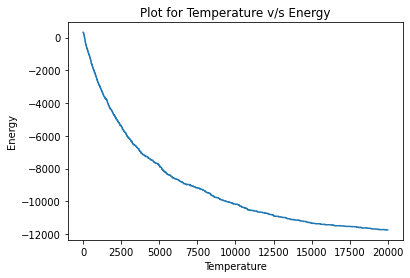

In [ ]:
X,Y = [],[]
ising.kT = 1
ising.random_config()       # randomize configuration
for i in range(0,20000):
    state = ising.MC()      # for updating the configuration
    X.append(ising.E())
    Y.append(i)

plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Plot for Temperature v/s Energy')
plt.plot(Y,X)

## Plot of Magnetization v/s Temperature

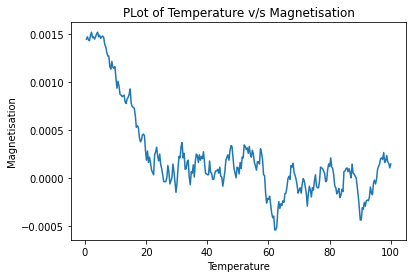

In [ ]:
X,Y = [],[]
ising.B = 0
for i in np.linspace(0.5,100,300):
    ising.kT = i
    X.append(ising.magnetize_step(100,100))     # appending the magnetization in each step
    Y.append(i)
plt.xlabel('Temperature')
plt.ylabel('Magnetisation')
plt.title('PLot of Temperature v/s Magnetisation')
plt.plot(Y,X)